# Part A

In [426]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, GridSearchCV    # Train test Split and Grid Search
from sklearn.ensemble import RandomForestClassifier

import statsmodels.api as SM
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    roc_auc_score
)

import warnings
warnings.filterwarnings('ignore')

from IPython.core.display import display, HTML
display(HTML('<style>.container { width:90% !important; }<\style>'))

In [427]:
Company = pd.read_csv('Company29.csv')

#Glimpse of Data
Company.head()

Num  Networth Next Year  Total assets  Net worth  Total income  \
0    1               395.3         827.6      336.5         534.1   
1    2                36.2          67.7       24.3         137.9   
2    3                84.0         238.4       78.9         331.2   
3    4              2041.4        6883.5     1443.3        8448.5   
4    5                41.8          90.9       47.0         388.6   

   Change in stock  Total expenses  Profit after tax  PBDITA    PBT  ...  \
0             13.5           508.7              38.9   124.4   64.6  ...   
1             -3.7           131.0               3.2     5.5    1.0  ...   
2            -18.1           309.2               3.9    25.8   10.5  ...   
3            212.2          8482.4             178.3   418.4  185.1  ...   
4              3.4           392.7              -0.7     7.2   -0.6  ...   

   Debtors turnover  Finished goods turnover  WIP turnover  \
0              5.65                     3.99          3.37   
1               NaN                      NaN           NaN   
2              2.51                    17.67          8.76   
3              1.91                    18.14         18.62   
4             68.00                    45.87         28.67   

   Raw material turnover  Shares outstanding  Equity face value    EPS  \
0                  14.87           8760056.0               10.0   4.44   
1                    NaN                 NaN                NaN   0.00   
2                   8.35                 NaN                NaN   0.00   
3                  11.11          10000000.0               10.0  17.60   
4                  19.93            107315.0              100.0  -6.52   

   Adjusted EPS  Total liabilities  PE on BSE  
0          4.44              827.6        NaN  
1          0.00               67.7        NaN  
2          0.00              238.4        NaN  
3         17.60             6883.5        NaN  
4         -6.52               90.9        NaN  

[5 rows x 51 columns]

In [428]:
#Fixing messy column names
Company.columns = Company.columns.str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('%', 'perc').str.replace('/', '_to_')

In [429]:
Company.head()

Num  Networth_Next_Year  Total_assets  Net_worth  Total_income  \
0    1               395.3         827.6      336.5         534.1   
1    2                36.2          67.7       24.3         137.9   
2    3                84.0         238.4       78.9         331.2   
3    4              2041.4        6883.5     1443.3        8448.5   
4    5                41.8          90.9       47.0         388.6   

   Change_in_stock  Total_expenses  Profit_after_tax  PBDITA    PBT  ...  \
0             13.5           508.7              38.9   124.4   64.6  ...   
1             -3.7           131.0               3.2     5.5    1.0  ...   
2            -18.1           309.2               3.9    25.8   10.5  ...   
3            212.2          8482.4             178.3   418.4  185.1  ...   
4              3.4           392.7              -0.7     7.2   -0.6  ...   

   Debtors_turnover  Finished_goods_turnover  WIP_turnover  \
0              5.65                     3.99          3.37   
1               NaN                      NaN           NaN   
2              2.51                    17.67          8.76   
3              1.91                    18.14         18.62   
4             68.00                    45.87         28.67   

   Raw_material_turnover  Shares_outstanding  Equity_face_value    EPS  \
0                  14.87           8760056.0               10.0   4.44   
1                    NaN                 NaN                NaN   0.00   
2                   8.35                 NaN                NaN   0.00   
3                  11.11          10000000.0               10.0  17.60   
4                  19.93            107315.0              100.0  -6.52   

   Adjusted_EPS  Total_liabilities  PE_on_BSE  
0          4.44              827.6        NaN  
1          0.00               67.7        NaN  
2          0.00              238.4        NaN  
3         17.60             6883.5        NaN  
4         -6.52               90.9        NaN  

[5 rows x 51 columns]

In [430]:
print('The number of rows (observations) is',Company.shape[0],'\n''The number of columns (variables) is',Company.shape[1])

The number of rows (observations) is 4256 
The number of columns (variables) is 51


In [431]:
Company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4256 entries, 0 to 4255
Data columns (total 51 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Num                                             4256 non-null   int64  
 1   Networth_Next_Year                              4256 non-null   float64
 2   Total_assets                                    4256 non-null   float64
 3   Net_worth                                       4256 non-null   float64
 4   Total_income                                    4025 non-null   float64
 5   Change_in_stock                                 3706 non-null   float64
 6   Total_expenses                                  4091 non-null   float64
 7   Profit_after_tax                                4102 non-null   float64
 8   PBDITA                                          4102 non-null   float64
 9   PBT                                      

In [432]:
Company.describe().T

count          mean  \
Num                                             4256.0  2.128500e+03   
Networth_Next_Year                              4256.0  1.344741e+03   
Total_assets                                    4256.0  3.573617e+03   
Net_worth                                       4256.0  1.351950e+03   
Total_income                                    4025.0  4.688190e+03   
Change_in_stock                                 3706.0  4.370248e+01   
Total_expenses                                  4091.0  4.356301e+03   
Profit_after_tax                                4102.0  2.950506e+02   
PBDITA                                          4102.0  6.059406e+02   
PBT                                             4102.0  4.102590e+02   
Cash_profit                                     4102.0  4.082675e+02   
PBDITA_as_perc_of_total_income                  4177.0  3.179892e+00   
PBT_as_perc_of_total_income                     4177.0 -1.819683e+01   
PAT_as_perc_of_total_income                     4177.0 -2.003367e+01   
Cash_profit_as_perc_of_total_income             4177.0 -9.021278e+00   
PAT_as_perc_of_net_worth                        4256.0  1.016786e+01   
Sales                                           3951.0  4.645685e+03   
Income_from_fincial_services                    3145.0  8.136006e+01   
Other_income                                    2700.0  5.595289e+01   
Total_capital                                   4251.0  2.245577e+02   
Reserves_and_funds                              4158.0  1.210562e+03   
Borrowings                                      3825.0  1.176248e+03   
Current_liabilities_&_provisions                4146.0  9.606314e+02   
Deferred_tax_liability                          2887.0  2.344951e+02   
Shareholders_funds                              4256.0  1.376487e+03   
Cumulative_retained_profits                     4211.0  9.371820e+02   
Capital_employed                                4256.0  2.433618e+03   
TOL_to_TNW                                      4256.0  4.025343e+00   
Total_term_liabilities__to__tangible_net_worth  4256.0  1.854288e+00   
Contingent_liabilities__to__Net_worth_perc      4256.0  5.570750e+01   
Contingent_liabilities                          2854.0  9.485522e+02   
Net_fixed_assets                                4124.0  1.209487e+03   
Investments                                     2541.0  7.218659e+02   
Current_assets                                  4176.0  1.350360e+03   
Net_working_capital                             4219.0  1.628742e+02   
Quick_ratio_times                               4151.0  1.497355e+00   
Current_ratio_times                             4151.0  2.257398e+00   
Debt_to_equity_ratio_times                      4256.0  2.871563e+00   
Cash_to_current_liabilities_times               4151.0  5.284197e-01   
Cash_to_average_cost_of_sales_per_day           4156.0  1.451579e+02   
Creditors_turnover                              3865.0  1.681226e+01   
Debtors_turnover                                3871.0  1.792903e+01   
Finished_goods_turnover                         3382.0  8.436999e+01   
WIP_turnover                                    3492.0  2.868451e+01   
Raw_material_turnover                           3828.0  1.773393e+01   
Shares_outstanding                              3446.0  2.376491e+07   
Equity_face_value                               3446.0 -1.094829e+03   
EPS                                             4256.0 -1.962175e+02   
Adjusted_EPS                                    4256.0 -1.975276e+02   
Total_liabilities                               4256.0  3.573617e+03   
PE_on_BSE                                       1629.0  5.546229e+01   

                                                         std           min  \
Num                                             1.228746e+03  1.000000e+00   
Networth_Next_Year                              1.593674e+04 -7.426560e+04   
Total_assets                                    3.007444e+04  1.000000

In [433]:
# 1. Identify duplicate rows
duplicates = Company.duplicated()
print("Duplicate rows (True indicates a duplicate):")
print(duplicates)

# 2. Count duplicate rows
num_duplicates = duplicates.sum()
print(f"Number of duplicate rows: {num_duplicates}")

# 3. View duplicate rows
duplicate_rows = Company[Company.duplicated()]
print("Duplicate rows:")
print(duplicate_rows)

# View all instances of duplicate rows, including the first occurrence
all_duplicate_rows = Company[Company.duplicated(keep=False)]
print("All instances of duplicate rows (including first occurrence):")
print(all_duplicate_rows)

# 4. Remove duplicate rows (keeping the first occurrence)
df_no_duplicates = Company.drop_duplicates()
print("DataFrame after removing duplicates (keeping first occurrence):")
print(df_no_duplicates)

# Remove duplicate rows (keeping the last occurrence)
df_no_duplicates_last = Company.drop_duplicates(keep='last')
print("DataFrame after removing duplicates (keeping last occurrence):")
print(df_no_duplicates_last)

# Remove duplicate rows (dropping all duplicates)
df_no_duplicates_none = Company.drop_duplicates(keep=False)
print("DataFrame after removing all duplicates (keeping none):")
print(df_no_duplicates_none)

Duplicate rows (True indicates a duplicate):
0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
30      False
31      False
32      False
33      False
34      False
35      False
36      False
37      False
38      False
39      False
40      False
41      False
42      False
43      False
44      False
45      False
46      False
47      False
48      False
49      False
50      False
51      False
52      False
53      False
54      False
55      False
56      False
57      False
58      False
59      False
60      False
61      False
62      False
63      False
64      False
65      False
66      False
67      False
68 

In [434]:
Company.drop(['Num'], axis = 1, inplace = True)

In [435]:
#Creating a binary target variable using 'Networth_Next_Year'
Company['default'] = np.where((Company['Networth_Next_Year'] > 0), 0, 1)

In [436]:
Company[['default','Networth_Next_Year']].head(10)

default  Networth_Next_Year
0        0               395.3
1        0                36.2
2        0                84.0
3        0              2041.4
4        0                41.8
5        0               291.5
6        0                93.3
7        0               985.1
8        0               188.6
9        0               229.6

# Exploratory Data Analysis 

### Univariate Analysis 

In [437]:
Company['default'].value_counts()

0    3352
1     904
Name: default, dtype: int64

In [438]:
#Checking proportion of default
Company['default'].value_counts(normalize = True)

0    0.787594
1    0.212406
Name: default, dtype: float64

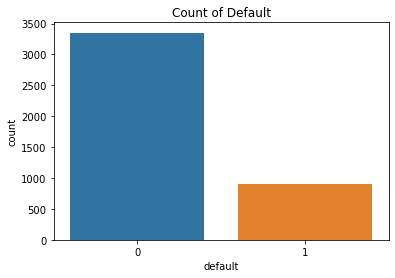

In [439]:
sns.countplot(x = "default", data = Company)   
plt.title('Count of Default')
plt.show()

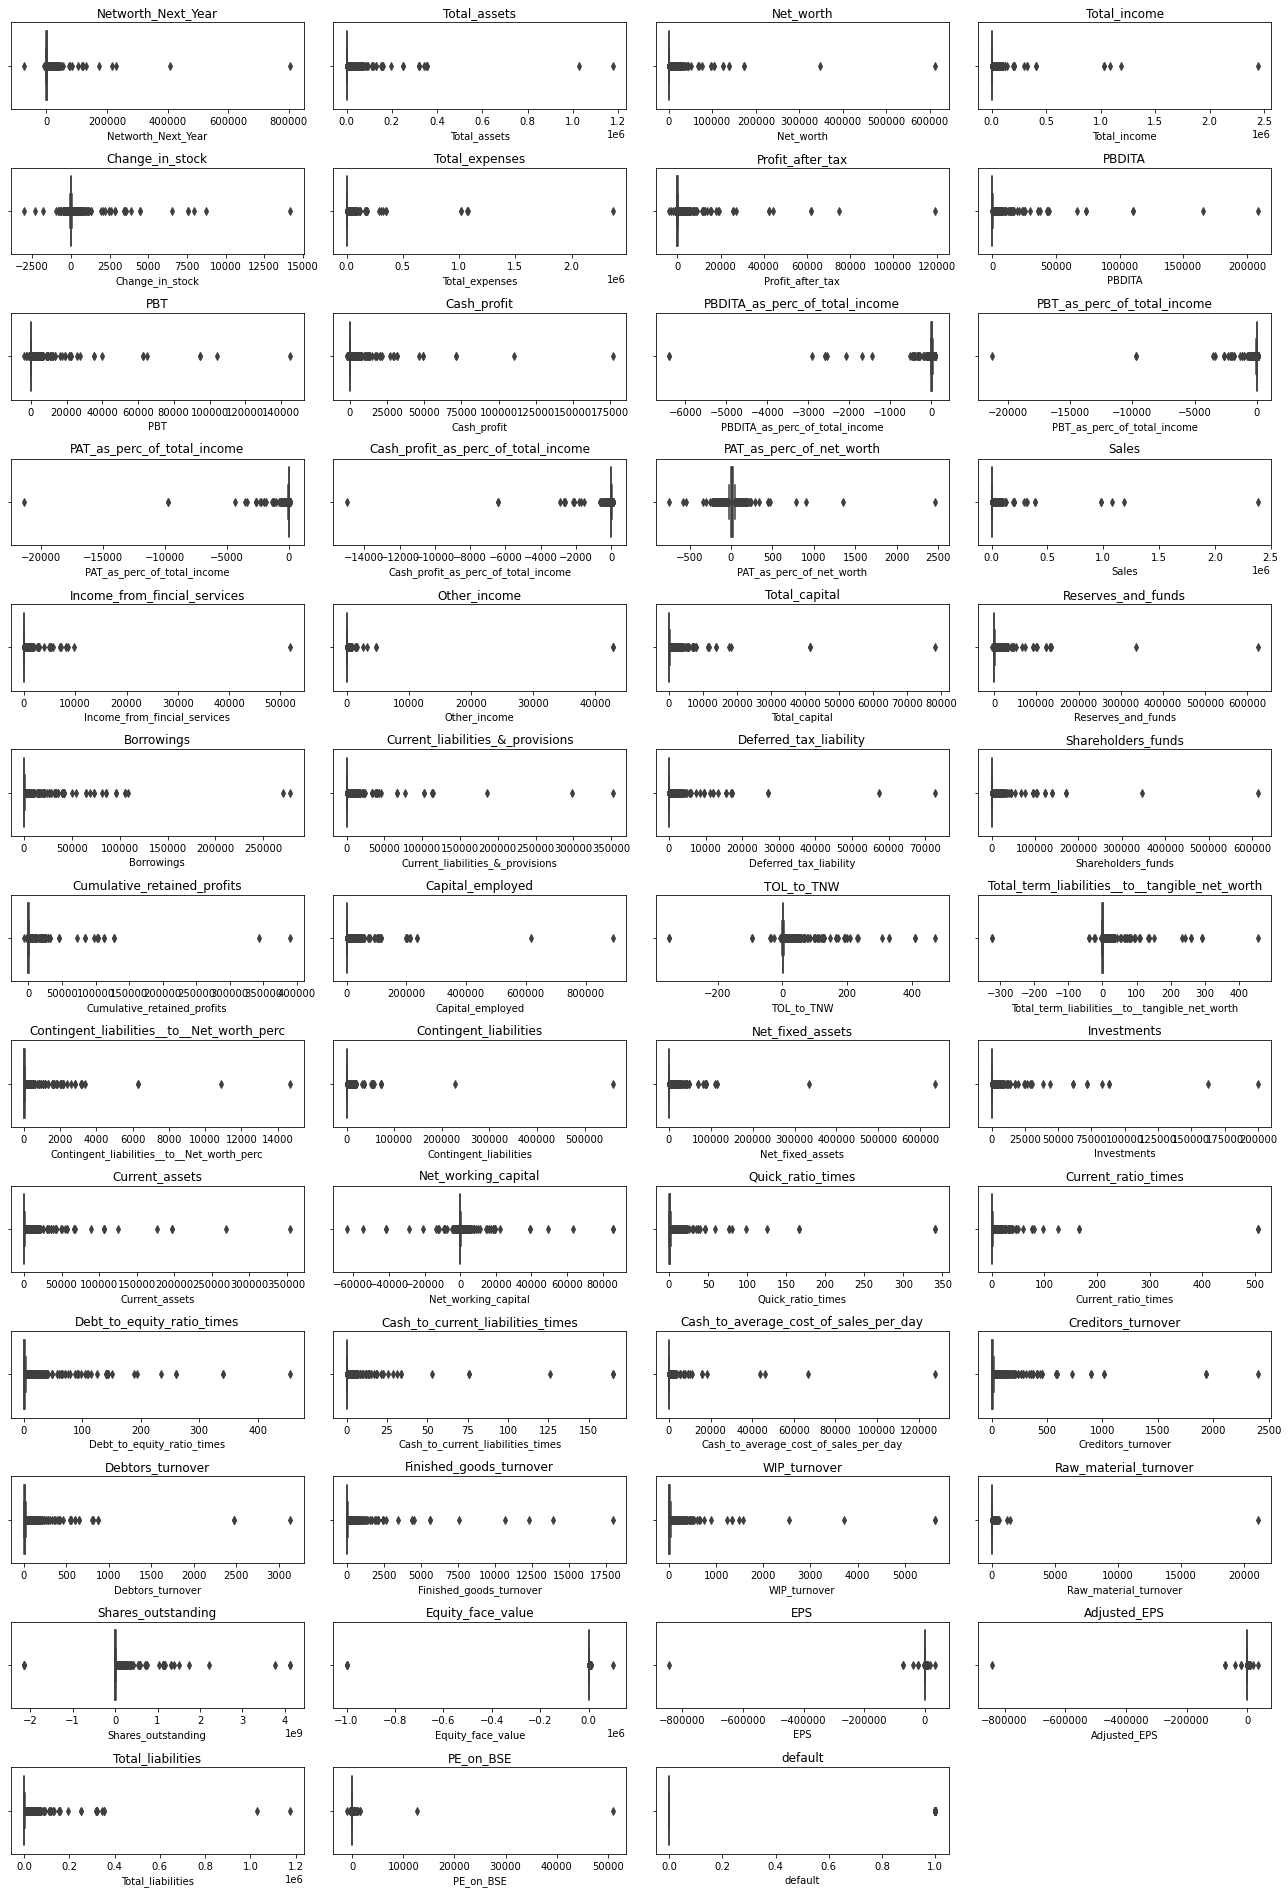

In [440]:
#Get boxplots for all the numerical columns
numeric_columns = Company.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(18, 30))

for i, variable in enumerate(numeric_columns):
    plt.subplot(15, 4, i + 1)
    sns.boxplot(data=Company, x=variable)  
    plt.tight_layout()
    plt.title(variable)

## Bivariate Analysis

<AxesSubplot:>

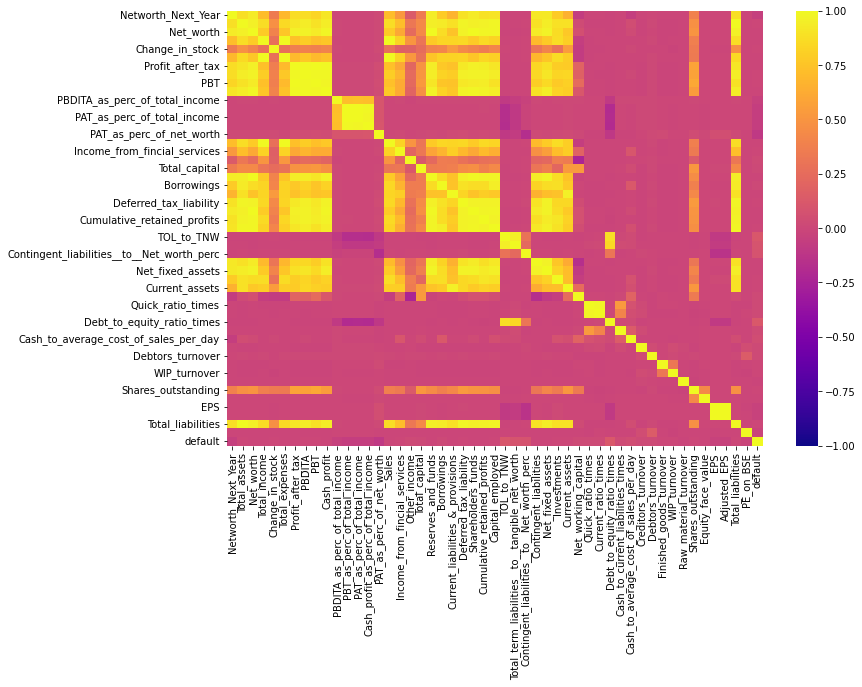

In [441]:
#Inspect possible correlations between independent variables
plt.figure(figsize = (12,8))
cor_matrix = Company.corr()
sns.heatmap(cor_matrix, cmap = 'plasma', vmin = -1, vmax= 1)

# Data Preprocessing

In [442]:
#Dropping columns with few unique values
Company.nunique()

Networth_Next_Year                                2574
Total_assets                                      2961
Net_worth                                         2376
Total_income                                      2870
Change_in_stock                                   1164
Total_expenses                                    2898
Profit_after_tax                                  1467
PBDITA                                            1826
PBT                                               1568
Cash_profit                                       1655
PBDITA_as_perc_of_total_income                    2032
PBT_as_perc_of_total_income                       1878
PAT_as_perc_of_total_income                       1692
Cash_profit_as_perc_of_total_income               1867
PAT_as_perc_of_net_worth                          2385
Sales                                             2847
Income_from_fincial_services                       561
Other_income                                       406
Total_capi

In [443]:
Company.drop(['Equity_face_value'], axis = 1, inplace = True) 
Company.nunique()

Networth_Next_Year                                2574
Total_assets                                      2961
Net_worth                                         2376
Total_income                                      2870
Change_in_stock                                   1164
Total_expenses                                    2898
Profit_after_tax                                  1467
PBDITA                                            1826
PBT                                               1568
Cash_profit                                       1655
PBDITA_as_perc_of_total_income                    2032
PBT_as_perc_of_total_income                       1878
PAT_as_perc_of_total_income                       1692
Cash_profit_as_perc_of_total_income               1867
PAT_as_perc_of_net_worth                          2385
Sales                                             2847
Income_from_fincial_services                       561
Other_income                                       406
Total_capi

In [444]:
print('Total number of values:', Company.size)

Total number of values: 212800


In [445]:
#Missing values
print('Total number of missing values:',Company.isnull().sum().sum())

Total number of missing values: 16968


In [446]:
print('Proportion of missing values:', 17778/217056)

Proportion of missing values: 0.08190513047324192


### Outlier treatment

In [447]:
# Seperating target variable from the rest of the data
Company_X = Company.drop(['default'], axis = 1)
Company_y = Company['default']

In [448]:
#Let's check the number of outliers per column
UL = Company_X.quantile(0.95)
LL = Company_X.quantile(0.05)

In [449]:
((Company_X > UL) | (Company_X < LL)).sum()

Networth_Next_Year                                422
Total_assets                                      424
Net_worth                                         421
Total_income                                      404
Change_in_stock                                   371
Total_expenses                                    410
Profit_after_tax                                  412
PBDITA                                            407
PBT                                               412
Cash_profit                                       411
PBDITA_as_perc_of_total_income                    418
PBT_as_perc_of_total_income                       418
PAT_as_perc_of_total_income                       418
Cash_profit_as_perc_of_total_income               416
PAT_as_perc_of_net_worth                          426
Sales                                             396
Income_from_fincial_services                      159
Other_income                                      138
Total_capital               

In [450]:
#Number of outliers
print('Number of outliers =',((Company_X > UL) | (Company_X < LL)).sum().sum())

Number of outliers = 17261


Outliers can have a disproportionate effect on logistic regression models, leading to inaccurate predictions, biased coefficients, and poor model performance. Therefore, we replace the outliers with missing values.

In [451]:
#Replacing outlier values as missing values so that we can do logistic reression.
Company_X[((Company_X > UL) | (Company_X < LL))]= np.nan

In [452]:
print('New missing values:', Company_X.isnull().sum().sum())

New missing values: 34229


In [453]:
#Proportion of new missing values = New missing values/Total number of values
print('Proportion of new missing values =', 35681/221312)

Proportion of new missing values = 0.16122487709658762


In [454]:
Company_sub1 = pd.concat([Company_X, Company_y], axis =1 )

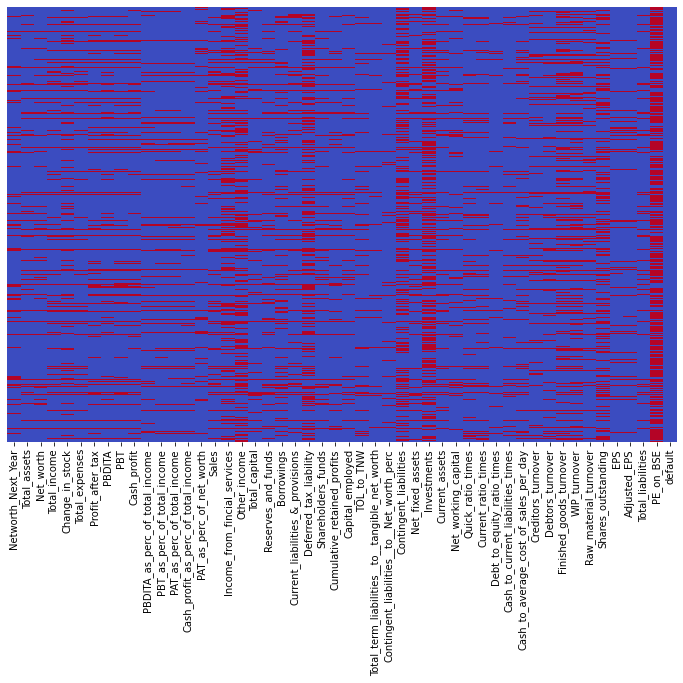

In [455]:
#Let's visually inspect the missing values in our data
plt.figure(figsize = (12,8))
sns.heatmap(Company_sub1.isnull(), cbar = False, cmap = 'coolwarm', yticklabels = False)
plt.show()

In [456]:
#Inspecting total missing values by each row.
Company_sub1.isnull().sum(axis = 1)

0        3
1        8
2        3
3        8
4        6
5        1
6        7
7        9
8        3
9        9
10       3
11      24
12      13
13      21
14       4
15       0
16       4
17       5
18      10
19      28
20      21
21       2
22      13
23       9
24       2
25       7
26      22
27       5
28       2
29       6
30      19
31       2
32       1
33       9
34       2
35       5
36      21
37       5
38       3
39       0
40       3
41      26
42       1
43      19
44       8
45       5
46       6
47      11
48       0
49      11
50       1
51      29
52       4
53       0
54      21
55       5
56       4
57       2
58      29
59       4
60       0
61       2
62       1
63      25
64       3
65       2
66       1
67       2
68      27
69       2
70       1
71      25
72       1
73       3
74       5
75      10
76      11
77      12
78      11
79       4
80      16
81       0
82       5
83      15
84       5
85       3
86      13
87       7
88       0
89       2
90      27

In [457]:
#Let's filter the data which is 90% or more complete at the row level
Company_sub1_temp = Company_sub1[Company_sub1.isnull().sum(axis = 1) <= 5]

In [458]:
Company_sub1_temp.shape

(2277, 50)

In [459]:
Company_sub1_temp['default'].value_counts()

0    1886
1     391
Name: default, dtype: int64

In [460]:
print('Proportion of default =',376/2186)

Proportion of default = 0.17200365965233302


Original data has 21.2% default rate.

The subset data has 17.2% default rate.

The difference in 5% could be due to the removal of outliers.

In [461]:
Company_sub1.isnull().sum().sort_values(ascending = False)/Company_sub1.index.size

PE_on_BSE                                         0.655780
Investments                                       0.437500
Other_income                                      0.398026
Contingent_liabilities                            0.392152
Deferred_tax_liability                            0.384868
Income_from_fincial_services                      0.298402
Finished_goods_turnover                           0.285009
Shares_outstanding                                0.271617
WIP_turnover                                      0.261043
Change_in_stock                                   0.216400
Borrowings                                        0.189850
Sales                                             0.164709
Total_income                                      0.149201
Raw_material_turnover                             0.146382
Creditors_turnover                                0.137218
Debtors_turnover                                  0.136043
Total_expenses                                    0.1351

In [462]:
#Dropping columns with more than 30% missing values
Company_sub2 = Company_sub1.drop(['PE_on_BSE', 'Investments','Other_income', 'Contingent_liabilities',
                              'Deferred_tax_liability'],
                           axis = 1)

In [463]:
Company_sub2.shape

(4256, 45)

In [464]:
#Segregate the predictors and response
predictors = Company_sub2.drop('default', axis = 1)
response = Company_sub2['default']

In [465]:
#Scale the predictors
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
scaled_predictors = pd.DataFrame(scaler.fit_transform(predictors), columns = predictors.columns)

In [466]:
Company_sub3 = pd.concat([scaled_predictors, response], axis = 1)

In [467]:
Company_sub3.head()

Networth_Next_Year  Total_assets  Net_worth  Total_income  Change_in_stock  \
0            0.213211     -0.060087   0.027953     -0.352867         0.056329   
1           -0.471916     -0.574692  -0.552842     -0.589588        -0.505736   
2           -0.380719     -0.459094  -0.451268     -0.474096        -0.976302   
3            3.353808      4.040978   2.086966      4.375810              NaN   
4           -0.461232     -0.558981  -0.510613     -0.439800        -0.273721   

   Total_expenses  Profit_after_tax    PBDITA       PBT  Cash_profit  ...  \
0       -0.347371         -0.108144 -0.019667 -0.026319     0.106451  ...   
1       -0.587956         -0.462447 -0.552284 -0.495799    -0.526542  ...   
2       -0.474447         -0.455500 -0.461349 -0.425672    -0.487759  ...   
3        4.731669          1.275324  1.297316  0.863184     0.679885  ...   
4       -0.421260         -0.501152 -0.544669 -0.507610    -0.525849  ...   

   Creditors_turnover  Debtors_turnover  Finished_goods_turnover  \
0            0.385776         -0.356914                -0.771523   
1                 NaN               NaN                      NaN   
2           -0.769318         -0.753081                -0.368102   
3           -0.616293         -0.828782                -0.354242   
4            1.628490               NaN                 0.463512   

   WIP_turnover  Raw_material_turnover  Shares_outstanding       EPS  \
0     -0.802256               1.037574           -0.043546 -0.219342   
1           NaN                    NaN                 NaN -0.517708   
2     -0.428702               0.087719                 NaN -0.517708   
3      0.254646               0.489805            0.047953  0.665003   
4      0.951161               1.774731           -0.682057       NaN   

   Adjusted_EPS  Total_liabilities  default  
0     -0.154137          -0.060087        0  
1     -0.488979          -0.574692        0  
2     -0.488979          -0.459094        0  
3      0.838320           4.040978        0  
4           NaN          -0.558981        0  

[5 rows x 45 columns]

In [468]:
# Seperating target variable from the rest of the data
Company_X = Company_sub3.drop(['default'], axis = 1)
Company_y = Company_sub3['default']

In [469]:
#Splitting the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(Company_X, Company_y, test_size=0.25, random_state=42, stratify = Company_y)  

# Missing Values Detection and Treatment

In [470]:
# Check missing values
X_train.isnull().sum()

Networth_Next_Year                                311
Total_assets                                      313
Net_worth                                         306
Total_income                                      481
Change_in_stock                                   704
Total_expenses                                    434
Profit_after_tax                                  439
PBDITA                                            429
PBT                                               437
Cash_profit                                       431
PBDITA_as_perc_of_total_income                    387
PBT_as_perc_of_total_income                       391
PAT_as_perc_of_total_income                       389
Cash_profit_as_perc_of_total_income               389
PAT_as_perc_of_net_worth                          320
Sales                                             527
Income_from_fincial_services                      960
Total_capital                                     320
Reserves_and_funds          

In [471]:
# Check missing values
X_test.isnull().sum()

Networth_Next_Year                                111
Total_assets                                      111
Net_worth                                         115
Total_income                                      154
Change_in_stock                                   217
Total_expenses                                    141
Profit_after_tax                                  127
PBDITA                                            132
PBT                                               129
Cash_profit                                       134
PBDITA_as_perc_of_total_income                    110
PBT_as_perc_of_total_income                       106
PAT_as_perc_of_total_income                       108
Cash_profit_as_perc_of_total_income               106
PAT_as_perc_of_net_worth                          106
Sales                                             174
Income_from_fincial_services                      310
Total_capital                                     105
Reserves_and_funds          

In [472]:
#Replace the missing values in the data using KNN Imputer
KNNimputerModel = KNNImputer(n_neighbors=5)  

X_train = pd.DataFrame(KNNimputerModel.fit_transform(X_train), columns = X_train.columns)
X_test = pd.DataFrame(KNNimputerModel.transform(X_test), columns = X_test.columns) 

In [473]:
print(X_train.isnull().sum().sum())
print(X_test.isnull().sum().sum())

0
0


In [474]:
X_train.head()

Networth_Next_Year  Total_assets  Net_worth  Total_income  Change_in_stock  \
0            0.219698     -0.330222   0.127108     -0.350955        -0.341692   
1           -0.167034     -0.323450  -0.265421      0.668043        -0.306399   
2           -0.519423     -0.611599  -0.578887     -0.632905        -0.384173   
3           -0.540982     -0.246926  -0.403086     -0.228234         1.608544   
4           -0.236291     -0.134172  -0.465035     -0.259840        -0.075691   

   Total_expenses  Profit_after_tax    PBDITA       PBT  Cash_profit  ...  \
0       -0.390303         -0.363203 -0.395052 -0.344473    -0.316006  ...   
1        0.748161         -0.329459 -0.335026 -0.277299    -0.270297  ...   
2       -0.662954         -0.484281 -0.571994 -0.495061    -0.545933  ...   
3       -0.168509         -0.353278 -0.168836 -0.346687     0.003261  ...   
4       -0.325969         -0.428704 -0.255291 -0.454461    -0.349248  ...   

   Cash_to_average_cost_of_sales_per_day  Creditors_turnover  \
0                               3.797720            0.224359   
1                              -0.589975            0.011851   
2                               1.795613           -0.908769   
3                              -0.582306            1.676619   
4                              -0.621654            0.275944   

   Debtors_turnover  Finished_goods_turnover  WIP_turnover  \
0         -0.383409                -0.558017     -0.432860   
1          0.157094                 0.195744      0.414463   
2         -1.069762                -0.391222     -0.154531   
3          0.686494                -0.615522     -0.426623   
4          0.770269                -0.260405     -0.911758   

   Raw_material_turnover  Shares_outstanding       EPS  Adjusted_EPS  \
0               1.761619            2.496401 -0.500236     -0.469371   
1              -0.420132           -0.264834 -0.518380     -0.489733   
2              -1.128735           -0.616183 -0.450509     -0.413564   
3               0.543708           -0.654112  1.445861      1.714639   
4               3.307318            1.966568 -0.495532     -0.464092   

   Total_liabilities  
0          -0.330222  
1          -0.323450  
2          -0.611599  
3          -0.246926  
4          -0.134172  

[5 rows x 44 columns]

In [475]:
X_test.head()

Networth_Next_Year  Total_assets  Net_worth  Total_income  Change_in_stock  \
0           -0.344278     -0.441419  -0.406993     -0.580984        -0.319470   
1           -0.386633     -0.533179  -0.451454     -0.520161         0.441932   
2           -0.143567     -0.314579  -0.224308     -0.353286        -0.600503   
3           -0.206527     -0.481306  -0.590235     -0.566167         0.255666   
4            2.258100     -0.004556   0.117993     -0.048214         0.752375   

   Total_expenses  Profit_after_tax    PBDITA       PBT  Cash_profit  ...  \
0       -0.554069         -0.570822 -0.571456 -0.560168    -0.565740  ...   
1       -0.494958         -0.470387 -0.516447 -0.474392    -0.527235  ...   
2       -0.358072         -0.147842 -0.304118 -0.114900    -0.257831  ...   
3       -0.542795         -0.545812 -0.567066 -0.537875    -0.570173  ...   
4       -0.042133          0.407927  0.096353  0.223185     0.240807  ...   

   Cash_to_average_cost_of_sales_per_day  Creditors_turnover  \
0                              -0.611317            0.163643   
1                              -0.568300           -0.403045   
2                               0.356724           -0.228793   
3                              -0.535621           -0.383053   
4                              -0.527618           -0.353435   

   Debtors_turnover  Finished_goods_turnover  WIP_turnover  \
0         -0.521941                 2.233493      2.376766   
1         -1.069510                -0.764446     -0.682912   
2         -0.337989                 0.345258     -0.570777   
3         -0.179017                -0.446250      0.104254   
4         -0.228223                -0.512012     -0.672655   

   Raw_material_turnover  Shares_outstanding       EPS  Adjusted_EPS  \
0              -0.674204            0.728932 -0.622539     -0.606626   
1              -1.128735           -0.510969 -0.517708     -0.488979   
2               0.623834           -0.267817 -0.519052     -0.490487   
3              -0.221129           -0.653079 -0.518111     -0.489431   
4              -0.015716            1.013937 -0.253614     -0.192599   

   Total_liabilities  
0          -0.441419  
1          -0.533179  
2          -0.314579  
3          -0.481306  
4          -0.004556  

[5 rows x 44 columns]

# Model Building

In [476]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification(model, predictors, target, threshold = 0.5):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    y_pred = model.predict(predictors)

    if len(list(set(y_pred))) != 2:
        y_prob_pred = model.predict(predictors)

        y_pred=[]
        for i in range(0,len(y_prob_pred)):
            if np.array(y_prob_pred)[i] > threshold:
                a=1
            else:
                a=0
            y_pred.append(a)
    else:
        pass

    acc = accuracy_score(target, y_pred)  # to compute Accuracy
    recall = recall_score(target, y_pred)  # to compute Recall
    precision = precision_score(target, y_pred)  # to compute Precision
    f1 = f1_score(target, y_pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[1],
    )

    return df_perf

In [477]:
def model_confusion_matrix(model, predictors, target, threshold = 0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    if len(list(set(y_pred))) != 2:
        y_prob_pred = model.predict(predictors)

        y_pred=[]
        for i in range(0,len(y_prob_pred)):
            if np.array(y_prob_pred)[i] > threshold:
                a=1
            else:
                a=0
            y_pred.append(a)
    else:
        pass

    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Logistic Regression 

In [478]:
# Adding constant to data for Logistic Regression
X_train_with_intercept = SM.add_constant(X_train)
X_test_with_intercept = SM.add_constant(X_test)

In [479]:
X_train_with_intercept.head()

const  Networth_Next_Year  Total_assets  Net_worth  Total_income  \
0    1.0            0.219698     -0.330222   0.127108     -0.350955   
1    1.0           -0.167034     -0.323450  -0.265421      0.668043   
2    1.0           -0.519423     -0.611599  -0.578887     -0.632905   
3    1.0           -0.540982     -0.246926  -0.403086     -0.228234   
4    1.0           -0.236291     -0.134172  -0.465035     -0.259840   

   Change_in_stock  Total_expenses  Profit_after_tax    PBDITA       PBT  ...  \
0        -0.341692       -0.390303         -0.363203 -0.395052 -0.344473  ...   
1        -0.306399        0.748161         -0.329459 -0.335026 -0.277299  ...   
2        -0.384173       -0.662954         -0.484281 -0.571994 -0.495061  ...   
3         1.608544       -0.168509         -0.353278 -0.168836 -0.346687  ...   
4        -0.075691       -0.325969         -0.428704 -0.255291 -0.454461  ...   

   Cash_to_average_cost_of_sales_per_day  Creditors_turnover  \
0                               3.797720            0.224359   
1                              -0.589975            0.011851   
2                               1.795613           -0.908769   
3                              -0.582306            1.676619   
4                              -0.621654            0.275944   

   Debtors_turnover  Finished_goods_turnover  WIP_turnover  \
0         -0.383409                -0.558017     -0.432860   
1          0.157094                 0.195744      0.414463   
2         -1.069762                -0.391222     -0.154531   
3          0.686494                -0.615522     -0.426623   
4          0.770269                -0.260405     -0.911758   

   Raw_material_turnover  Shares_outstanding       EPS  Adjusted_EPS  \
0               1.761619            2.496401 -0.500236     -0.469371   
1              -0.420132           -0.264834 -0.518380     -0.489733   
2              -1.128735           -0.616183 -0.450509     -0.413564   
3               0.543708           -0.654112  1.445861      1.714639   
4               3.307318            1.966568 -0.495532     -0.464092   

   Total_liabilities  
0          -0.330222  
1          -0.323450  
2          -0.611599  
3          -0.246926  
4          -0.134172  

[5 rows x 45 columns]

In [480]:
y_train.reset_index(inplace = True, drop = True)

In [481]:
# Fit the Logistic Regression model
LogisticReg = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
LogisticReg.fit(X_train_with_intercept, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    5.3s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

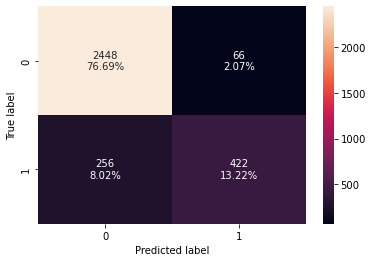

In [482]:
#Logistic Regression Model - Training Performance
model_confusion_matrix(LogisticReg, X_train_with_intercept, y_train)

In [483]:
logistic_regression_perf_train = model_performance_classification(LogisticReg, X_train_with_intercept, y_train)
logistic_regression_perf_train

Accuracy    Recall  Precision        F1
1  0.899123  0.622419   0.864754  0.723842

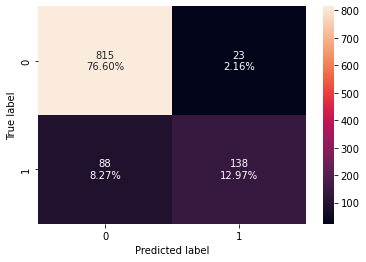

In [484]:
#Logistic Regression Model - Test Performance
model_confusion_matrix(LogisticReg, X_test_with_intercept, y_test) 

In [485]:
logistic_regression_perf_test = model_performance_classification(LogisticReg, X_test_with_intercept, y_test)  
logistic_regression_perf_test

Accuracy    Recall  Precision        F1
1  0.895677  0.610619   0.857143  0.713178

### Random Forest

In [486]:
rf_classifier = RandomForestClassifier(n_estimators=100,random_state=42) 
rf_model = rf_classifier.fit(X_train, y_train)

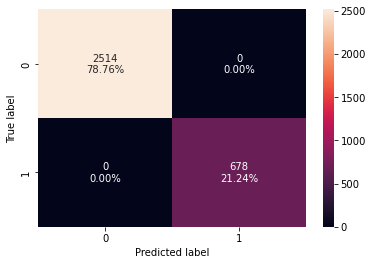

In [487]:
#Random Forest Model - Training Performance
model_confusion_matrix(rf_model, X_train, y_train)

In [488]:
random_forest_perf_train = model_performance_classification(rf_model, X_train, y_train)
random_forest_perf_train

Accuracy  Recall  Precision   F1
1       1.0     1.0        1.0  1.0

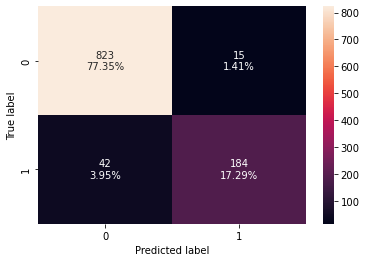

In [489]:
#Random Forest Model - Test Performance
model_confusion_matrix(rf_model, X_test, y_test) 

In [490]:
random_forest_perf_test = model_performance_classification(rf_model, X_test, y_test)  
random_forest_perf_test

Accuracy    Recall  Precision        F1
1  0.946429  0.814159   0.924623  0.865882

## Model Performance Improvement

### Model Performance Improvement - Logistic Regression 

In [491]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
    """
    Calculate Variance Inflation Factor (VIF) for each variable in a DataFrame.

    Parameters:
    X (DataFrame): Input DataFrame containing numerical variables.

    Returns:
    DataFrame: DataFrame containing variable names and their corresponding VIF values.
    """
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif

# Initialize the DataFrames
X_train_reduced = X_train.copy()
X_test_reduced = X_test.copy()

# Loop to remove variables with high VIF
while True:
    # Calculate VIF
    vif_df = calc_vif(X_train_reduced)
    
    # Identify variables with high VIF
    high_vif_vars = vif_df[vif_df["VIF"] > 5]["variables"].tolist()
    
    if len(high_vif_vars) == 0:
        break  # Exit the loop if no variables have VIF greater than 5
    
    # Drop variables with high VIF from both X_train and X_test
    X_train_reduced = X_train_reduced.drop(columns=high_vif_vars)
    X_test_reduced = X_test_reduced.drop(columns=high_vif_vars)
    
    print(f"Removed variables with high VIF: {high_vif_vars}")

# Print the final set of variables and their VIF for the reduced training data
final_vif_df = calc_vif(X_train_reduced)
print("\nFinal VIF values:")
print(final_vif_df.sort_values(by='VIF', ascending=True))

Removed variables with high VIF: ['Total_assets', 'Net_worth', 'Total_income', 'Total_expenses', 'Profit_after_tax', 'PBDITA', 'PBT', 'Cash_profit', 'PBT_as_perc_of_total_income', 'PAT_as_perc_of_total_income', 'Cash_profit_as_perc_of_total_income', 'Sales', 'Reserves_and_funds', 'Borrowings', 'Current_liabilities_&_provisions', 'Shareholders_funds', 'Cumulative_retained_profits', 'Capital_employed', 'Net_fixed_assets', 'Current_assets', 'Debt_to_equity_ratio_times', 'EPS', 'Adjusted_EPS', 'Total_liabilities']

Final VIF values:
                                         variables       VIF
8       Contingent_liabilities__to__Net_worth_perc  1.165844
1                                  Change_in_stock  1.327897
18                           Raw_material_turnover  1.377601
4                     Income_from_fincial_services  1.409556
2                   PBDITA_as_perc_of_total_income  1.411039
14                              Creditors_turnover  1.421196
3                         PAT_as_perc_

In [492]:
X_train_reduced.shape

(3192, 20)

In [493]:
X_test_reduced.shape

(1064, 20)

In [494]:
X_train_new_with_intercept = SM.add_constant(X_train_reduced)
X_test_new_with_intercept = SM.add_constant(X_test_reduced)

In [495]:
# Retraining Logistic Regression Model with new data
LogisticReg_improved = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
LogisticReg_improved.fit(X_train_new_with_intercept, y_train) 

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    1.1s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

In [496]:
# Finding Optimal Threshold value
logit_y_pred = LogisticReg_improved.predict(X_train_new_with_intercept)
fpr, tpr, thresholds = roc_curve(y_train, logit_y_pred)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_logit = round(thresholds[optimal_idx], 3)
optimal_threshold_logit

1

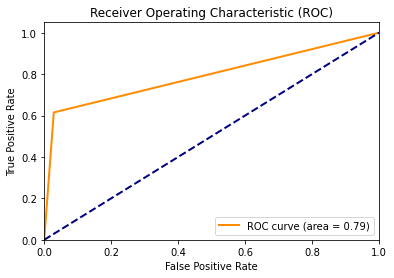

In [497]:
roc_auc = roc_auc_score(y_train, logit_y_pred) 
# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

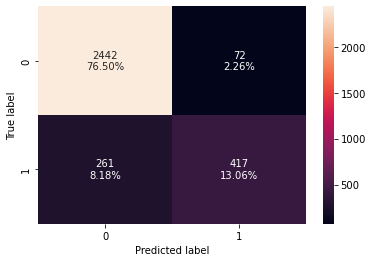

In [498]:
#Logistic Regression Performance - Training Set
model_confusion_matrix(LogisticReg_improved, X_train_new_with_intercept, y_train, optimal_threshold_logit)

In [499]:
logistic_regression_tuned_perf_train = model_performance_classification(
    LogisticReg_improved, X_train_new_with_intercept, y_train, optimal_threshold_logit
)
logistic_regression_tuned_perf_train

Accuracy    Recall  Precision        F1
1  0.895677  0.615044   0.852761  0.714653

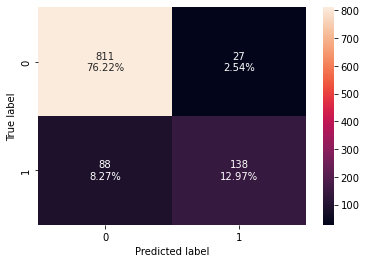

In [500]:
#Logistic Regression Performance - Test Set
model_confusion_matrix(LogisticReg_improved, X_test_new_with_intercept, y_test, optimal_threshold_logit)

In [501]:
logistic_regression_tuned_perf_test = model_performance_classification(LogisticReg_improved, X_test_new_with_intercept, y_test, optimal_threshold_logit) 
logistic_regression_tuned_perf_test

Accuracy    Recall  Precision        F1
1  0.891917  0.610619   0.836364  0.705882

### Model Performance Improvement - Random Forest 

In [502]:
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [5, 7, 9],    # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],    # Minimum number of samples required to split a node
    'min_samples_leaf': [5, 6, 7],  # Minimum number of samples required at each leaf node
}

rf_classifier = RandomForestClassifier(class_weight='balanced', random_state=42)

grid_search = GridSearchCV(
    estimator=rf_classifier,
    param_grid=param_grid,
    cv=5,
    scoring='recall',
    n_jobs=-1
)

grid_search.fit(X_train_reduced, y_train)

print("Best parameters:", grid_search.best_params_)

Best parameters: {'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 200}


In [503]:
# Access the best estimator directly if needed
best_rf_classifier = grid_search.best_estimator_

In [504]:
params_used = best_rf_classifier.get_params()

# Print the parameters
print("Parameters used in the Random Forest Classifier:")
for param_name, param_value in params_used.items():
    print(f"{param_name}: {param_value}")

Parameters used in the Random Forest Classifier:
bootstrap: True
ccp_alpha: 0.0
class_weight: balanced
criterion: gini
max_depth: 5
max_features: auto
max_leaf_nodes: None
max_samples: None
min_impurity_decrease: 0.0
min_samples_leaf: 5
min_samples_split: 2
min_weight_fraction_leaf: 0.0
n_estimators: 200
n_jobs: None
oob_score: False
random_state: 42
verbose: 0
warm_start: False


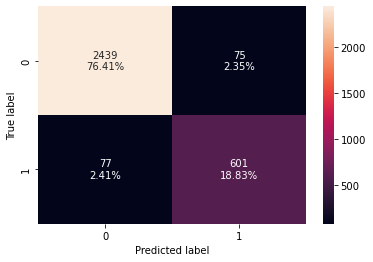

In [505]:
#Random Forest Performance - Training Set
model_confusion_matrix(best_rf_classifier, X_train_reduced, y_train)

In [506]:
random_forest_tuned_perf_train = model_performance_classification(best_rf_classifier, X_train_reduced, y_train) 
random_forest_tuned_perf_train

Accuracy    Recall  Precision       F1
1  0.952381  0.886431   0.889053  0.88774

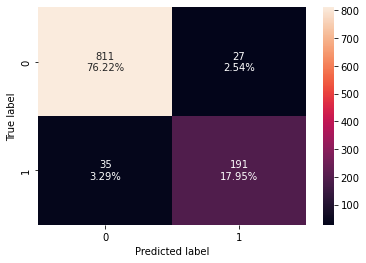

In [507]:
#Random Forest Performance - Test Set
model_confusion_matrix(best_rf_classifier, X_test_reduced, y_test)

In [508]:
random_forest_tuned_perf_test = model_performance_classification(best_rf_classifier, X_test_reduced, y_test)  
random_forest_tuned_perf_test

Accuracy    Recall  Precision       F1
1  0.941729  0.845133   0.876147  0.86036

# Model Comparison and Final Model Selection

In [509]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        logistic_regression_perf_train.T,
        logistic_regression_tuned_perf_train.T,
        random_forest_perf_train.T,
        random_forest_tuned_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression",
    "Tuned Logistic Regression",
    "Random Forest",
    "Tuned Random Forest",
]
print("Training performance comparison:")
models_train_comp_df



Training performance comparison:


Logistic Regression  Tuned Logistic Regression  Random Forest  \
Accuracy              0.899123                   0.895677            1.0   
Recall                0.622419                   0.615044            1.0   
Precision             0.864754                   0.852761            1.0   
F1                    0.723842                   0.714653            1.0   

           Tuned Random Forest  
Accuracy              0.952381  
Recall                0.886431  
Precision             0.889053  
F1                    0.887740

In [510]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        logistic_regression_perf_test.T,
        logistic_regression_tuned_perf_test.T,
        random_forest_perf_test.T,
        random_forest_tuned_perf_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression",
    "Tuned Logistic Regression",
    "Random Forest",
    "Tuned Random Forest",
]
print("Testing performance comparison:")
models_test_comp_df


Testing performance comparison:


Logistic Regression  Tuned Logistic Regression  Random Forest  \
Accuracy              0.895677                   0.891917       0.946429   
Recall                0.610619                   0.610619       0.814159   
Precision             0.857143                   0.836364       0.924623   
F1                    0.713178                   0.705882       0.865882   

           Tuned Random Forest  
Accuracy              0.941729  
Recall                0.845133  
Precision             0.876147  
F1                    0.860360

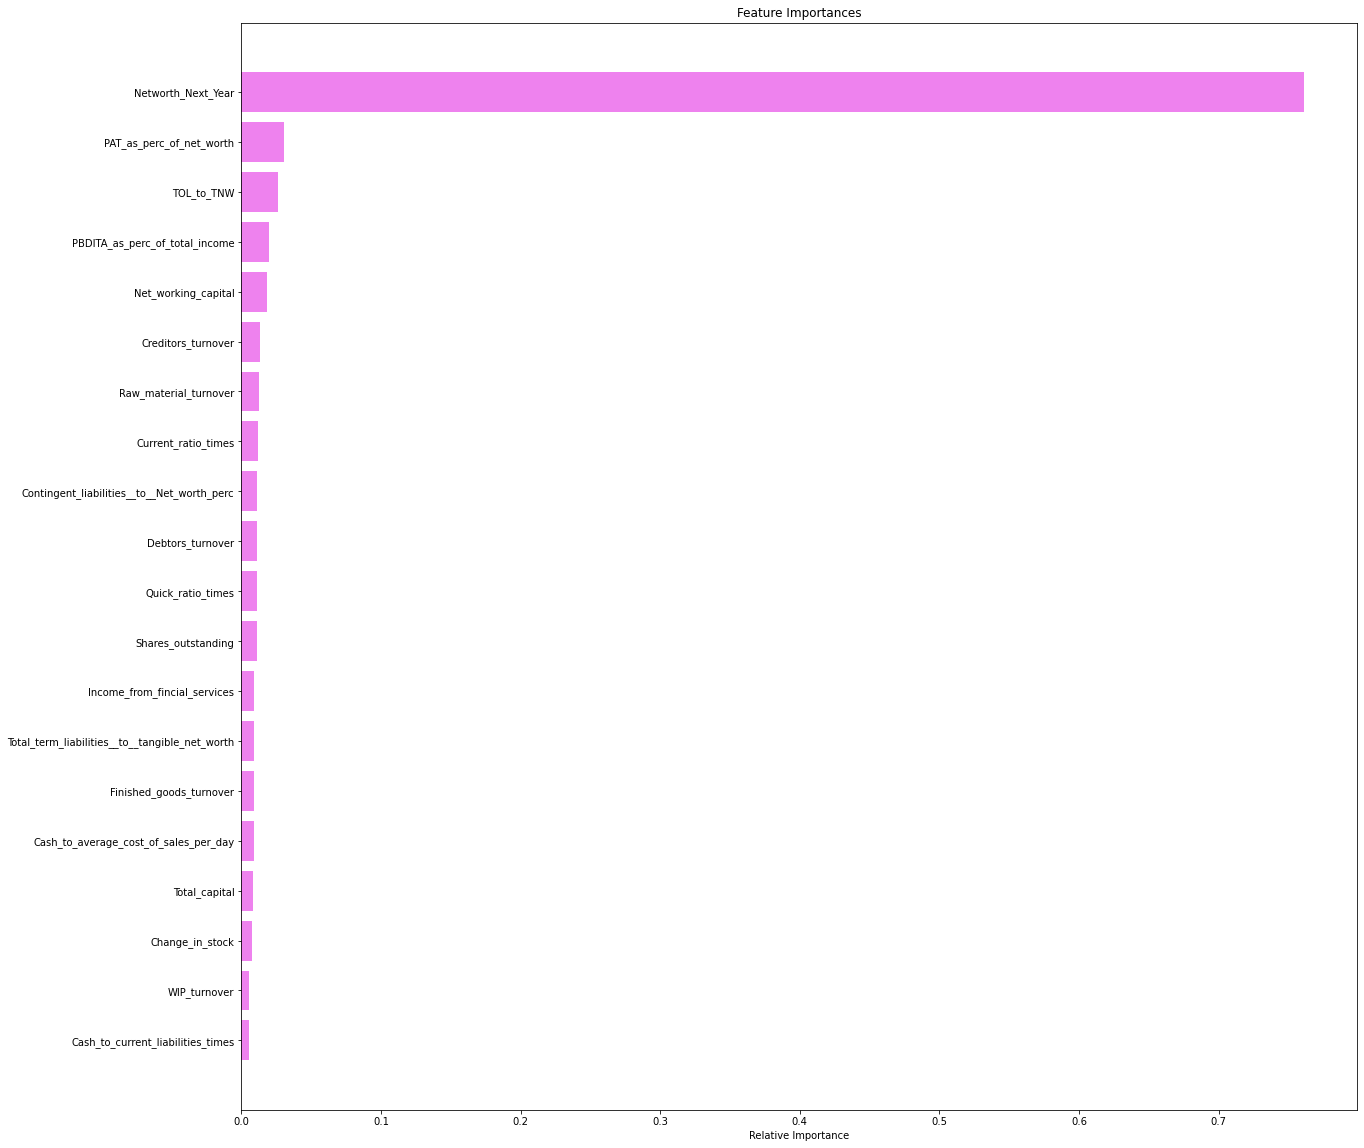

In [511]:
feature_names = X_train_reduced.columns
importances = best_rf_classifier.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(20, 20))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

# Part B

In [512]:
df = pd.read_csv('Market_Risk_Data_coded.csv')

#Glimpse of Data
df.head()

Date  ITC Limited  Bharti Airtel  Tata Motors  DLF Limited  Yes Bank
0  28-03-2016          217            316          386          114       173
1  04-04-2016          218            302          386          121       171
2  11-04-2016          215            308          374          120       171
3  18-04-2016          223            320          408          122       172
4  25-04-2016          214            319          418          122       175

In [513]:
#Data dimension
df.shape

(418, 6)

In [514]:
#Data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           418 non-null    object
 1   ITC Limited    418 non-null    int64 
 2   Bharti Airtel  418 non-null    int64 
 3   Tata Motors    418 non-null    int64 
 4   DLF Limited    418 non-null    int64 
 5   Yes Bank       418 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 19.7+ KB


In [515]:
#Statistical summary
df.describe()

ITC Limited  Bharti Airtel  Tata Motors  DLF Limited    Yes Bank
count   418.000000     418.000000   418.000000   418.000000  418.000000
mean    278.964115     528.260766   368.617225   276.827751  124.442584
std      75.114405     226.507879   182.024419   156.280781  130.090884
min     156.000000     261.000000    65.000000   110.000000   11.000000
25%     224.250000     334.000000   186.000000   166.250000   16.000000
50%     265.500000     478.000000   399.500000   213.000000   30.000000
75%     304.000000     706.750000   466.000000   360.500000  249.750000
max     493.000000    1236.000000  1035.000000   928.000000  397.000000

In [516]:
#Checking null values
df.isnull().sum()

Date             0
ITC Limited      0
Bharti Airtel    0
Tata Motors      0
DLF Limited      0
Yes Bank         0
dtype: int64

In [517]:
# Convert object to DateTime
df['Date']  = pd.to_datetime(df['Date'])  
df.head()

Date  ITC Limited  Bharti Airtel  Tata Motors  DLF Limited  Yes Bank
0 2016-03-28          217            316          386          114       173
1 2016-04-04          218            302          386          121       171
2 2016-11-04          215            308          374          120       171
3 2016-04-18          223            320          408          122       172
4 2016-04-25          214            319          418          122       175

## Stock Price Analysis 

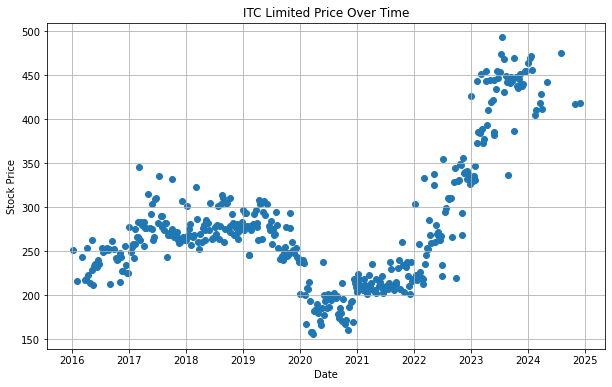

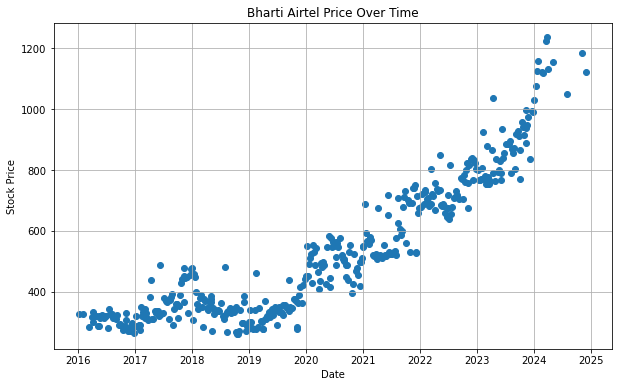

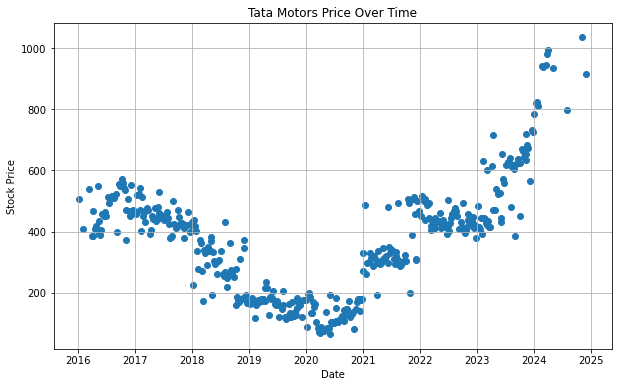

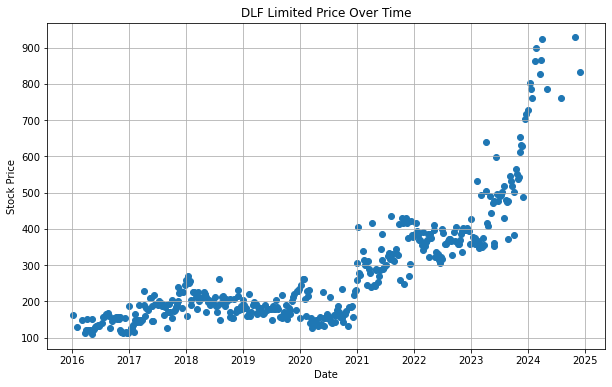

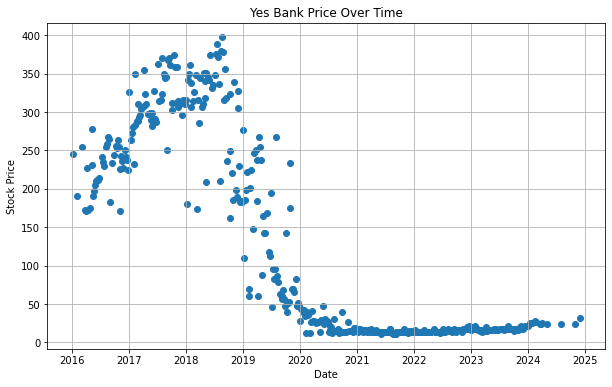

In [518]:
numeric_columns = df.select_dtypes(include='number').columns  

for i, stock in enumerate (numeric_columns):
    plt.figure(figsize=(10, 6))
    plt.scatter(df['Date'], df[stock])  
    plt.title(f'{stock} Price Over Time')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.grid(True)
    plt.show()

## Returns and Volatility Analysis

In [519]:
#Return Calculation
Return_of_Stocks =  np.log(df.drop(['Date'],axis=1)).diff(axis = 0)

# Set the display options to show all rows and columns
pd.set_option('display.max_rows', None)  # Set to None to display all rows

Return_of_Stocks

ITC Limited  Bharti Airtel  Tata Motors  DLF Limited  Yes Bank
0            NaN            NaN          NaN          NaN       NaN
1       0.004598      -0.045315     0.000000     0.059592 -0.011628
2      -0.013857       0.019673    -0.031582    -0.008299  0.000000
3       0.036534       0.038221     0.087011     0.016529  0.005831
4      -0.041196      -0.003130     0.024214     0.000000  0.017291
5       0.009302       0.024769    -0.024214     0.055791  0.082238
6      -0.013986      -0.006135    -0.019803    -0.015625 -0.037538
7      -0.004706      -0.015504    -0.015114    -0.040166  0.042787
8       0.094452      -0.025318    -0.012772     0.016261  0.030930
9       0.012793       0.019048     0.040308     0.039531  0.039806
10      0.000000       0.012500     0.122982     0.030537  0.024098
11     -0.017094      -0.025159    -0.015402    -0.007547  0.009479
12      0.033902       0.022048     0.030570     0.015038  0.000000
13     -0.016807      -0.006250    -0.028355    -0.007491  0.009390
14      0.073502       0.045950     0.032647     0.133531  0.058974
15     -0.023906      -0.012048     0.010650     0.038715 -0.004415
16      0.004024       0.035718     0.047579     0.000000  0.039051
17      0.004008      -0.041797     0.021979     0.000000 -0.021506
18      0.007968       0.000000     0.001974     0.031155  0.063179
19      0.003960      -0.003053     0.021464     0.012195  0.036076
20      0.003945      -0.043757    -0.001932    -0.012195  0.015625
21     -0.007905       0.009539    -0.015595     0.024244  0.034289
22      0.003960      -0.019170     0.025220    -0.042820 -0.007519
23      0.038765      -0.077090     0.052251    -0.064539  0.047891
24     -0.026977       0.000000     0.001817     0.019803 -0.106160
25      0.023167       0.013841     0.005430    -0.040005 -0.070422
26     -0.034955       0.010257    -0.007246     0.052993  0.046130
27     -0.036221      -0.038133    -0.020203    -0.046213  0.044095
28     -0.008230       0.014035     0.057674     0.059034  0.003914
29     -0.008299      -0.042711    -0.023030    -0.038966 -0.011788
30      0.004158       0.003630    -0.025410     0.038966  0.042560
31      0.008265       0.039081    -0.012951    -0.045611 -0.038615
32      0.044273      -0.021128    -0.045722    -0.061875 -0.048397
33     -0.044273      -0.032553    -0.011765    -0.195170  0.004124
34     -0.063716       0.007326    -0.080043     0.000000 -0.029230
35      0.000000      -0.011009    -0.037001    -0.035091 -0.038882
36      0.004376       0.053873    -0.033825    -0.018019  0.017468
37      0.021599       0.037740     0.057923     0.053110  0.046520
38     -0.039221      -0.058943     0.019293    -0.035091 -0.020878
39      0.000000      -0.055060    -0.010672     0.000000 -0.056414
40      0.072837       0.029742     0.012793     0.035091  0.035091
41      0.004124       0.056955     0.055627     0.090597  0.078716
42      0.024391      -0.003466     0.039298    -0.007905  0.050496
43      0.023811       0.003466     0.007678     0.007905  0.029853
44      0.011696       0.006897     0.035685     0.068468  0.028988
45      0.063812       0.091868    -0.026170     0.064079  0.007117
46      0.000000       0.000000    -0.028820     0.027213  0.003540
47     -0.033275       0.045950    -0.126594    -0.041102  0.017514
48      0.000000      -0.009023     0.026202     0.041102  0.000000
49     -0.011342      -0.021375    -0.004320    -0.027213  0.003466
50      0.000000       0.015314     0.015038    -0.020907  0.023933
51      0.073293      -0.053055     0.016914     0.041385  0.026668
52     -0.010657      -0.019418    -0.016914     0.000000  0.006557
53      0.010657       0.019418    -0.002134     0.006734  0.012987
54     -0.028676       0.006390     0.008511     0.026492  0.006431
55      0.007246      -0.016052    -0.043297     0.044736  0.037740
56     -0.003617       0.003231    -0.026907     0.134312 -0.044171
57      0.007220       0.031749     0.042275     0.016261  0.

In [520]:
#Average Returns
StockMeans = Return_of_Stocks.mean()
StockMeans.sort_values()

Yes Bank        -0.004737
ITC Limited      0.001634
Tata Motors      0.002234
Bharti Airtel    0.003271
DLF Limited      0.004863
dtype: float64

In [521]:
#Volatility
StockStdDev = Return_of_Stocks.std()
StockStdDev.sort_values()

ITC Limited      0.035904
Bharti Airtel    0.038728
DLF Limited      0.057785
Tata Motors      0.060484
Yes Bank         0.093879
dtype: float64

In [522]:
#Visualizing Returns and Volatility
data = pd.DataFrame({
    'Mean': StockMeans,
    'StdDev': StockStdDev
})
data


Mean    StdDev
ITC Limited    0.001634  0.035904
Bharti Airtel  0.003271  0.038728
Tata Motors    0.002234  0.060484
DLF Limited    0.004863  0.057785
Yes Bank      -0.004737  0.093879

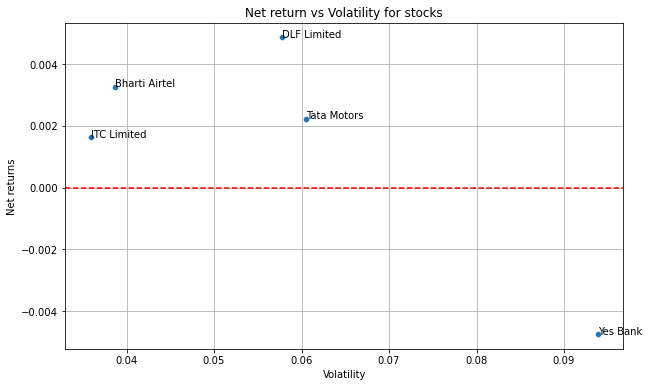

In [523]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x='StdDev', y='Mean', data=data, ax=ax)
plt.axhline(y=0, linestyle='--', color="red")

for index, row in data.iterrows():
    ax.text(row['StdDev'], row['Mean'], index)

plt.xlabel('Volatility')
plt.ylabel('Net returns')
plt.title('Net return vs Volatility for stocks')
plt.grid()
plt.show()
